<a class="anchor" id="TOC"></a>
# **Table of Contents**

[Table of Contents](#TOC)

[Introduction](#init)

[1 Importing Libraries +Bring in Data](#initexp)

>[1.1 Importing Libraries](#initexp1)

>[1.2 Reading in the Data](#initexp2)

>[1.3 Basic Information about the Dataframes](#initexp3)

>>[1.3.1 Information about the application train dataframe](#initexp4)

>>[1.3.2 Information about the application test dataframe](#initexp5)

>>[1.3.3 Information about the bureau dataframe](#initexp6)


>>[1.3.4 Information about the app_train_bureau dataframe](#initexp7)

>>[1.3.5 Information about the app_test_bureau dataframe](#initexp8)

[2. Data Cleaning: Handling Missing Values and Outliers](#initexp9)

>[2.1 Cleaning the application train dataframe](#initexp10)

>>[2.1.1 Replacing the remaining null values in the dataframe](#initexp11)

>>[2.1.2 Using Winsorization to handle outliers](#initexp12)

>[2.2 Cleaning the application test dataframe](#initexp13)

>[2.3 Cleaning the Bureau Dataframe](#initexp13.1)

>[2.4 Joining the Clean Train and Clean Bureau Dataframe](#initexp13.2)

>[2.5 Joining the Clean Test and Clean Bureau Dataframe](#initexp14)

[3. Identifying the Performance Benchmark Established by the Majority Class Classifier](#initexp15)

[4.KNN Model](#initexp16)

>[4.1 KNN Model (with K = 5) on Cleaned App_train Dataframe](#initexp17)

>[4.2 KNN Model (with K = 3) on Cleaned App_train Dataframe](#initexp18)

>[4.3 KNN Model (with K = 3) on Cleaned App_train Dataframe with Sampling](#initexp19)

>[4.4 KNN Model (with K = 3) on Cleaned App_train_bureau Dataframe](#initexp20)

>[4.5 KNN Model (with K = 5) on Cleaned App_train Dataframe](#initexp21)

>[4.6 KNN Model (with K = 5) on Cleaned App_train Dataframe with Sampling](#initexp22)

>[4.7 KNN Results](#initexp23)

>[5.Light Gradient Boosting Model](#initexp24)

>[5.1 LGB Model on Cleaned App_train Dataframe](#initexp25)

>[5.2 LGB Model on Cleaned App_train Dataframe with Sampling](#initexp26)

>[5.3 LGB Model on Cleaned App_train_bureau Dataframe](#initexp27)

>[5.4 LGB Model on Cleaned App_train_bureau Dataframe with Sampling](#initexp28)

>[5.5 LGB Results](#initexp29)

[6.Gradient Boosting Model](#initexp30)

>[6.1 Gradient Boosting Model on Cleaned App_train Dataframe](#initexp31)

>[6.2 Gradient Boosting Results](#initexp32)

[7. Comparison of LGB & GB Results](#initexp33)

[8.Naive Bayes](#initexp34)

[9.Logistic Regression](#initexp35)

[10.Random Forest](#initexp36)

[11.Gradient Boosting](#initexp37)

[12.Ensemble Modeling using Voting Classifier](#initexp38)

[13.Modeling Process](#initexp39)

[14.Results](#initexp40)

[15.Model Rankings](#initexp41)

[16.Contributions](#initexp42)

# <a name = "init"> **Introduction**



In today's fast-paced world, access to credit plays a crucial role in enabling individuals to fulfill their goals and aspirations. However, the existing limitations of traditional banking institutions, including reliance on limited data and conventional risk assessment methods, often hinder deserving applicants, especially those with limited credit histories, from obtaining loans. Home Credit, a global consumer finance provider, strives to bridge this gap by offering innovative and personalized lending solutions, empowering unbanked and underserved individuals to access financial opportunities.

The Home Credit problem is paramount as it addresses the pressing need for fair and inclusive credit access while ensuring responsible lending practices. Accurately identifying potential defaulters is a pivotal aspect of Home Credit, as it minimizes financial risks, enhances profitability, and effectively channels resources toward customers with a higher probability of repayment.

To tackle this challenge, our team has developed various machine learning models designed to assess default risk based on the independent variables specified in the Home Credit problem. These models incorporate advanced analytics techniques and methodologies, providing a comprehensive and insightful understanding of creditworthiness. By compiling and comparing these models, we aim to present an in-depth analysis and evaluation of each approach, facilitating a better understanding of their strengths and weaknesses in addressing the Home Credit problem.


## <a name = "initexp">1.1 Importing Libraries + Bring in Data</a>

## <a name = "initexp1">1.1 Importing Libraries</a>

In [ ]:
!pip install category_encoders
!pip install imblearn
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.7 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler

## <a name = "initexp2"> 1.2 Reading in the Data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
os.chdir('/content/drive/MyDrive/home-credit-default-risk')

In [3]:
# reading in the application train dataset
app_train = pd.read_csv('application_train.csv',index_col='SK_ID_CURR')
# reading in the application test dataset
app_test = pd.read_csv('application_test.csv', index_col='SK_ID_CURR')
# reading in the 'Bureau' dataset
bureau = pd.read_csv('bureau.csv', index_col='SK_ID_CURR')
# Joining Train and Bureau
app_train_bureau = app_train.merge(bureau, on='SK_ID_CURR', how='inner')
# Joining Test and Bureau
app_test_bureau = app_test.merge(bureau, on='SK_ID_CURR', how='inner')

## <a name = "initexp3"> 1.3 Basic Information about the Dataframes



### <a name = "initexp4"> 1.3.1 Information about the application train dataframe


In [4]:
# shape
print('The shape is:',app_train.shape)

The shape is: (307511, 121)


In [5]:
# Information about the data types of the columns
print(app_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 286.2+ MB
None


In [6]:
# Descriptive statistics of the numeric columns
print(app_train.describe())

              TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean        0.080729       0.417052      1.687979e+05  5.990260e+05   
std         0.272419       0.722121      2.371231e+05  4.024908e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.700000e+05   
50%         0.000000       0.000000      1.471500e+05  5.135310e+05   
75%         0.000000       1.000000      2.025000e+05  8.086500e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307499.000000     3.072330e+05               307511.000000   
mean    27108.573909     5.383962e+05                    0.020868   
std     14493.737315     3.694465e+05                    0.013831   
min      1615.500000     4.050000e+04                    0.000290   
25%     16524.0

In [ ]:
# Displaying the number of missing values in each column
print(app_train.isnull().sum())

### <a name = "initexp5"> 1.3.2 Information about the application test dataframe

In [7]:
# shape
print('The shape is:',app_test.shape)

The shape is: (48744, 120)


In [8]:
# Information about the data types of the columns
print(app_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 100001 to 456250
Columns: 120 entries, NAME_CONTRACT_TYPE to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(39), object(16)
memory usage: 45.0+ MB
None


In [9]:
# Descriptive statistics of the numeric columns
print(app_test.describe())

       CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  48744.000000      4.874400e+04  4.874400e+04   48720.000000   
mean       0.397054      1.784318e+05  5.167404e+05   29426.240209   
std        0.709047      1.015226e+05  3.653970e+05   16016.368315   
min        0.000000      2.694150e+04  4.500000e+04    2295.000000   
25%        0.000000      1.125000e+05  2.606400e+05   17973.000000   
50%        0.000000      1.575000e+05  4.500000e+05   26199.000000   
75%        1.000000      2.250000e+05  6.750000e+05   37390.500000   
max       20.000000      4.410000e+06  2.245500e+06  180576.000000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE    DAYS_BIRTH  \
count     4.874400e+04                48744.000000  48744.000000   
mean      4.626188e+05                    0.021226 -16068.084605   
std       3.367102e+05                    0.014428   4325.900393   
min       4.500000e+04                    0.000253 -25195.000000   
25%       2.250000e+05       

In [ ]:
# Displaying the number of missing values in each column
print(app_test.isnull().sum())

### <a name = "initexp6"> 1.3.3 Information about the bureau dataframe

In [10]:
# Shape
print(bureau.shape)

(1716428, 16)


In [11]:
# Information about the data types of the columns
print(bureau.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716428 entries, 215354 to 246829
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_BUREAU            int64  
 1   CREDIT_ACTIVE           object 
 2   CREDIT_CURRENCY         object 
 3   DAYS_CREDIT             int64  
 4   CREDIT_DAY_OVERDUE      int64  
 5   DAYS_CREDIT_ENDDATE     float64
 6   DAYS_ENDDATE_FACT       float64
 7   AMT_CREDIT_MAX_OVERDUE  float64
 8   CNT_CREDIT_PROLONG      int64  
 9   AMT_CREDIT_SUM          float64
 10  AMT_CREDIT_SUM_DEBT     float64
 11  AMT_CREDIT_SUM_LIMIT    float64
 12  AMT_CREDIT_SUM_OVERDUE  float64
 13  CREDIT_TYPE             object 
 14  DAYS_CREDIT_UPDATE      int64  
 15  AMT_ANNUITY             float64
dtypes: float64(8), int64(5), object(3)
memory usage: 222.6+ MB
None


In [12]:
# Descriptive statistics of the numeric columns
print(bureau.describe())

       SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
count  1.716428e+06  1.716428e+06        1.716428e+06         1.610875e+06   
mean   5.924434e+06 -1.142108e+03        8.181666e-01         5.105174e+02   
std    5.322657e+05  7.951649e+02        3.654443e+01         4.994220e+03   
min    5.000000e+06 -2.922000e+03        0.000000e+00        -4.206000e+04   
25%    5.463954e+06 -1.666000e+03        0.000000e+00        -1.138000e+03   
50%    5.926304e+06 -9.870000e+02        0.000000e+00        -3.300000e+02   
75%    6.385681e+06 -4.740000e+02        0.000000e+00         4.740000e+02   
max    6.843457e+06  0.000000e+00        2.792000e+03         3.119900e+04   

       DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
count       1.082775e+06            5.919400e+05        1.716428e+06   
mean       -1.017437e+03            3.825418e+03        6.410406e-03   
std         7.140106e+02            2.060316e+05        9.622391e-02   
min      

In [13]:
# Displaying the number of missing values in each column
print(bureau.isnull().sum())

SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64


### <a name = "initexp7"> 1.3.4 Information about the app_train_bureau dataframe

In [14]:
# Shape
print(app_train_bureau.shape)

(1465325, 137)


### <a name = "initexp8"> 1.3.5 Information about the app_test_bureau dataframe

In [15]:
# Shape
print(app_test_bureau.shape)

(251103, 136)


In general, each dataframe has a lot of null values and needs cleaning

## <a name = "initexp9"> 2. Data Cleaning: Handling Missing Values and Outliers

## <a name = "initexp10"> 2.1 Cleaning the application train dataframe

In [16]:
#!pip install prettytable
from prettytable import PrettyTable

# Creating a table to see each columns total outliers and missing values
app_train_outlier = PrettyTable(['Outliers', "Missing Values"])

for col in app_train.columns:

    missing_values = app_train[col].isnull().sum()

    # Check for outliers
    if app_train[col].dtype in ['int64', 'float64']:
        mean = app_train[col].mean()
        std = app_train[col].std()
        outliers = ((app_train[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add the row to the table
    app_train_outlier.add_row([outliers, missing_values])

# Print the table
print(app_train_outlier)

+----------+----------------+
| Outliers | Missing Values |
+----------+----------------+
|  24825   |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   4272   |       0        |
|   454    |       0        |
|   3255   |       0        |
|   2959   |       12       |
|   4173   |      278       |
|   N/A    |      1292      |
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   8412   |       0        |
|    0     |       0        |
|    0     |       0        |
|   749    |       0        |
|    0     |       0        |
|   3369   |     202929     |
|    1     |       0        |
|    0     |       0        |
|    0     |       0        |
|   574    |       0        |
|    0     |       0        |
|  17442   |       0        |
|   N/A    |     96391      |
|   4007   |       2        |
|    0     |       0        |
|    0    

**Dropping columns with over 30% of their values being null**

In [17]:
## Dropping columns with over 30% of their values being null

# Create a copy
app_train_org = app_train.copy()

# Getting the percentage of nulls in each column
columns = app_train.isnull().sum()[app_train.isnull().sum() != 0].keys()
nulls_per = app_train.isnull().sum()[app_train.isnull().sum() != 0].values/app_train.shape[0]

# create a dataframe with only columns with nulls.
app_train_nulls = pd.DataFrame({'Column':columns,'% of Nulls in Column':nulls_per*100})
app_train_nulls = app_train_nulls.sort_values(by='% of Nulls in Column', ascending=False)

print(app_train_nulls)

# extract these columns from app_train_nulls
drop_cols = app_train_nulls[app_train_nulls['% of Nulls in Column']>30]['Column'].tolist()
keep_cols = [col for col in app_train.columns if col not in drop_cols]

# extract the new train dataframe
app_train_cleaned = app_train[keep_cols]

# Shape of new dataframe
print('The new shape is:', app_train_cleaned.shape)

                      Column  % of Nulls in Column
41           COMMONAREA_MEDI             69.872297
13            COMMONAREA_AVG             69.872297
27           COMMONAREA_MODE             69.872297
49  NONLIVINGAPARTMENTS_MEDI             69.432963
35  NONLIVINGAPARTMENTS_MODE             69.432963
..                       ...                   ...
7               EXT_SOURCE_2              0.214626
1            AMT_GOODS_PRICE              0.090403
0                AMT_ANNUITY              0.003902
5            CNT_FAM_MEMBERS              0.000650
60    DAYS_LAST_PHONE_CHANGE              0.000325

[67 rows x 2 columns]
The new shape is: (307511, 71)


Doing this removed 50 columns

**Dropping Rows**

In [18]:
# From doing EDA, we know there was 4 rows with 'XNA' in the Code_Gender Column. Lets remove those rows
app_train_cleaned = app_train_cleaned[app_train_cleaned['CODE_GENDER']!='XNA']

# We also know there is a value in the AMT_INCOME_TOTAL column that must be a value entered wrong. Lets remove that
app_train_cleaned = app_train_cleaned[app_train_cleaned['AMT_INCOME_TOTAL'] != 117000000.0]
print('The new shape is:', app_train_cleaned.shape)

The new shape is: (307506, 71)


## <a name = "initexp11"> 2.1.1 Replacing the remaining null values in the dataframe

In [19]:
## Replacing the remaining null values in the dataframe

# Create a copy of the DataFrame
app_train_cleaned_copy = app_train_cleaned.copy()

# In categorical columns, replacing nulls with the most frequent value of that column
for cat in app_train_cleaned_copy.describe(include='object').columns:
    mode_value = app_train_cleaned_copy[cat].mode().values[0]
    app_train_cleaned_copy.loc[:, cat].fillna(mode_value, inplace=True)

# In numerical columns, replacing nulls with the median value of that column
for num in app_train_cleaned_copy.describe().columns:
    median_value = app_train_cleaned_copy[num].median()
    app_train_cleaned_copy.loc[:, num].fillna(median_value, inplace=True)

app_train_cleaned = app_train_cleaned_copy

In [20]:
## Verifying that there are now no more null values in the dataframe
print(app_train_cleaned.isnull().sum())

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 71, dtype: int64


**There are now no more nulls in the dataframe**

## <a name = "initexp12"> 2.1.2 Using Winsorization to handle outliers**

In [21]:
## Using Winsorization to handle outliers

from scipy.stats.mstats import winsorize
numeric_columns = app_train_cleaned.select_dtypes(include=[np.number]).drop(columns=['TARGET'])

for column in numeric_columns.columns:
    app_train_cleaned[column] = winsorize(app_train_cleaned[column], limits=[0.05, 0.05])

print('The new shape is:', app_train_cleaned.shape)

The new shape is: (307506, 71)


In [ ]:
## Did not end up doing this

## Using the z-score method to remove outliers

# Getting numeric columns (excluding the target column)
#numeric_columns = app_train_cleaned.select_dtypes(include=[np.number]).drop(columns=['TARGET'])

# Calculate Z-scores for each value
#z_scores = np.abs((numeric_columns - numeric_columns.mean()) / numeric_columns.std())
#print(z_scores)

# Keep rows where all Z-scores are less than 3
#app_train_cleaned = app_train_cleaned[(z_scores < 3).all(axis=1)]

#print('The new shape is:', app_train_cleaned.shape)

## <a name = "initexp13"> 2.2 Cleaning the application test dataframe

In [22]:
#!pip install prettytable
from prettytable import PrettyTable

# Creating a table to see each columns total outliers and missing values
app_test_outlier = PrettyTable(['Outliers', "Missing Values"])

for col in app_test.columns:

    missing_values = app_test[col].isnull().sum()

    # Check for outliers
    if app_test[col].dtype in ['int64', 'float64']:
        mean = app_test[col].mean()
        std = app_test[col].std()
        outliers = ((app_test[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add the row to the table
    app_test_outlier.add_row([outliers, missing_values])

# Print the table
print(app_test_outlier)

+----------+----------------+
| Outliers | Missing Values |
+----------+----------------+
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   606    |       0        |
|   571    |       0        |
|   1129   |       0        |
|   505    |       24       |
|   1119   |       0        |
|   N/A    |      911       |
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   1565   |       0        |
|    0     |       0        |
|    0     |       0        |
|   124    |       0        |
|    0     |       0        |
|   465    |     32312      |
|    1     |       0        |
|    0     |       0        |
|    0     |       0        |
|    78    |       0        |
|    0     |       0        |
|    0     |       0        |
|   N/A    |     15605      |
|   576    |       0        |
|    0     |       0        |
|    1     |       0        |
|   N/A   

In [23]:
## Dropping columns with over 30% of their values being null

# Create a copy
app_test_org = app_test.copy()

# Getting the percentage of nulls in each column
columns = app_test.isnull().sum()[app_test.isnull().sum() != 0].keys()
nulls_per = app_test.isnull().sum()[app_test.isnull().sum() != 0].values/app_test.shape[0]

# create a dataframe with only columns with nulls.
app_test_nulls = pd.DataFrame({'Column':columns,'% of Nulls in Column':nulls_per*100})
app_test_nulls = app_test_nulls.sort_values(by='% of Nulls in Column', ascending=False)

print(app_test_nulls)

# extract these columns from app_test_nulls
drop_cols = app_test_nulls[app_test_nulls['% of Nulls in Column']>30]['Column'].tolist()
keep_cols = [col for col in app_test.columns if col not in drop_cols]

# extract the new test dataframe
app_test_cleaned = app_test[keep_cols]

# Shape of new dataframe
print('The new shape is: ', app_test_cleaned.shape)

                      Column  % of Nulls in Column
25           COMMONAREA_MODE             68.716150
39           COMMONAREA_MEDI             68.716150
11            COMMONAREA_AVG             68.716150
47  NONLIVINGAPARTMENTS_MEDI             68.412523
19   NONLIVINGAPARTMENTS_AVG             68.412523
..                       ...                   ...
56  OBS_60_CNT_SOCIAL_CIRCLE              0.059495
55  DEF_30_CNT_SOCIAL_CIRCLE              0.059495
54  OBS_30_CNT_SOCIAL_CIRCLE              0.059495
0                AMT_ANNUITY              0.049237
5               EXT_SOURCE_2              0.016412

[64 rows x 2 columns]
The new shape is:  (48744, 70)


Doing this removed 50 columns

In [24]:
## Replacing the remaining null values in the dataframe

# Create a copy of the DataFrame
app_test_cleaned_copy = app_test_cleaned.copy()

# In categorical columns, replacing nulls with the most frequent value of that column
for cate in app_test_cleaned_copy.describe(include='object').columns:
    mode_value = app_test_cleaned_copy[cate].mode().values[0]
    app_test_cleaned_copy.loc[:, cate].fillna(mode_value, inplace=True)

# In numerical columns, replacing nulls with the median value of that column
for nume in app_test_cleaned_copy.describe().columns:
    median_value = app_test_cleaned_copy[nume].median()
    app_test_cleaned_copy.loc[:, nume].fillna(median_value, inplace=True)

app_test_cleaned = app_test_cleaned_copy

In [25]:
## Verifying that there are now no more null values in the dataframe
print(app_test_cleaned.isnull().sum())

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 70, dtype: int64


There are now no more nulls in the dataframe

The dataframe is fully cleaned.

## <a name = "initexp13.1"> 2.3 Cleaning the Bureau Dataframe

In [26]:
#!pip install prettytable
from prettytable import PrettyTable

# Creating a table to see each columns total outliers and missing values
bureau_outlier = PrettyTable(['Outliers', "Missing Values"])

for col in bureau.columns:

    missing_values = bureau[col].isnull().sum()

    # Check for outliers
    if bureau[col].dtype in ['int64', 'float64']:
        mean = bureau[col].mean()
        std = bureau[col].std()
        outliers = ((bureau[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add the row to the table
    bureau_outlier.add_row([outliers, missing_values])

# Print the table
print(bureau_outlier)

+----------+----------------+
| Outliers | Missing Values |
+----------+----------------+
|    0     |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|    0     |       0        |
|   1194   |       0        |
|  38630   |     105553     |
|    1     |     633653     |
|   199    |    1124488     |
|   9114   |       0        |
|  16756   |       13       |
|  15543   |     257669     |
|  15704   |     591780     |
|   445    |       0        |
|   N/A    |       0        |
|   1409   |       0        |
|   460    |    1226791     |
+----------+----------------+


In [27]:
## Dropping columns with over 30% of their values being null

# Create a copy
bureau_org = bureau.copy()

# Getting the percentage of nulls in each column
columns = bureau.isnull().sum()[bureau.isnull().sum() != 0].keys()
nulls_per = bureau.isnull().sum()[bureau.isnull().sum() != 0].values/bureau.shape[0]

# create a dataframe with only columns with nulls.
bureau_nulls = pd.DataFrame({'Column':columns,'% of Nulls in Column':nulls_per*100})
bureau_nulls = bureau_nulls.sort_values(by='% of Nulls in Column', ascending=False)

print(bureau_nulls)

# extract these columns from app_test_nulls
drop_cols = bureau_nulls[bureau_nulls['% of Nulls in Column']>30]['Column'].tolist()
keep_cols = [col for col in bureau.columns if col not in drop_cols]

# extract the new test dataframe
bureau_cleaned = bureau[keep_cols]

# Shape of new dataframe
print('The new shape is: ', bureau_cleaned.shape)

                   Column  % of Nulls in Column
6             AMT_ANNUITY             71.473490
2  AMT_CREDIT_MAX_OVERDUE             65.513264
1       DAYS_ENDDATE_FACT             36.916958
5    AMT_CREDIT_SUM_LIMIT             34.477415
4     AMT_CREDIT_SUM_DEBT             15.011932
0     DAYS_CREDIT_ENDDATE              6.149573
3          AMT_CREDIT_SUM              0.000757
The new shape is:  (1716428, 12)


## **Doing this made the dataframe clean**

In [28]:
## Replacing the remaining null values in the dataframe

# Create a copy of the DataFrame
bureau_cleaned_copy = bureau_cleaned.copy()

# In categorical columns, replacing nulls with the most frequent value of that column
for cate in bureau_cleaned_copy.describe(include='object').columns:
    mode_value = bureau_cleaned_copy[cate].mode().values[0]
    bureau_cleaned_copy.loc[:, cate].fillna(mode_value, inplace=True)

# In numerical columns, replacing nulls with the median value of that column
for nume in bureau_cleaned_copy.describe().columns:
    median_value = bureau_cleaned_copy[nume].median()
    bureau_cleaned_copy.loc[:, nume].fillna(median_value, inplace=True)

bureau_cleaned = bureau_cleaned_copy

In [29]:
## Verifying that there are now no more null values in the dataframe
print(bureau_cleaned.isnull().sum())

SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
dtype: int64


## **There are now no more nulls.**

### **Using Winsorization to handle outliers in the Bureau Dataframe**

In [30]:
## Using Winsorization to handle outliers

from scipy.stats.mstats import winsorize
numeric_columns = bureau_cleaned.select_dtypes(include=[np.number])

for column in numeric_columns.columns:
    bureau_cleaned[column] = winsorize(bureau_cleaned[column], limits=[0.05, 0.05])

print('The new shape is:', bureau_cleaned.shape)

The new shape is: (1716428, 12)


In [ ]:
# Did not end up doing this

## Using the z-score method to remove outliers

# Getting numeric columns
#numeric_columns3 = bureau_cleaned.select_dtypes(include=[np.number])

# Calculate Z-scores for each value
#z_scores3 = np.abs((numeric_columns3 - numeric_columns3.mean()) / numeric_columns3.std())
#print(z_scores3)

# Keep rows where all Z-scores are less than 3
#bureau_cleaned = bureau_cleaned[(z_scores3 < 3 ).all(axis=1)]

#print('The new shape is:', bureau_cleaned.shape)

Now, the outliers have been taken care of, and the dataframe is fully cleaned.

## <a name = "initexp13.2"> 2.4 Joining the Clean Train and Clean Bureau Dataframe

In [31]:
# Joining
app_train_bureau_clean = app_train_cleaned.merge(bureau_cleaned, on='SK_ID_CURR', how='inner')

# New Shape
print(app_train_bureau_clean.shape)

(1465287, 83)


**The original joined dataframe had 1465325 rows and 138 columns.
This cleaned dataframe has 38 less rows and 55 less columns.**

## <a name = "initexp14"> 2.5 Joining the Clean Test and Clean Bureau Dataframe

In [32]:
# Joining
app_test_bureau_clean = app_test_cleaned.merge(bureau_cleaned, on='SK_ID_CURR', how='inner')

# New Shape
print(app_test_bureau_clean.shape)

(251103, 82)


**The original joined dataframe had 251103 rows and 137 columns.
This cleaned dataframe has 0 less rows and 55 less columns.**

# <a name = "initexp15"> 3. Identifying the Performance Benchmark Established by the Majority Class Classifier

In [33]:
## Doing this for the app_train dataframe

# Calculate the proportion of the majority class
majority_class_proportion = app_train['TARGET'].value_counts(normalize=True)[0]

# Calculate the performance benchmark as the proportion of the majority class
performance_benchmark = majority_class_proportion

print("Performance Benchmark (Majority Class Classifier) for Original Dataframe: {:.2%}".format(performance_benchmark))

Performance Benchmark (Majority Class Classifier) for Original Dataframe: 91.93%


In [34]:
## Doing this for the app_train_cleaned dataframe

# Calculate the proportion of the majority class
majority_class_proportion = app_train_cleaned['TARGET'].value_counts(normalize=True)[0]

# Calculate the performance benchmark as the proportion of the majority class
performance_benchmark = majority_class_proportion

print("Performance Benchmark (Majority Class Classifier) for the Cleaned Dataframe: {:.2%}".format(performance_benchmark))

Performance Benchmark (Majority Class Classifier) for the Cleaned Dataframe: 91.93%


In [35]:
## Doing this for the app_train_bureau dataframe

# Calculate the proportion of the majority class
majority_class_proportion = app_train_bureau['TARGET'].value_counts(normalize=True)[0]

# Calculate the performance benchmark as the proportion of the majority class
performance_benchmark = majority_class_proportion

print("Performance Benchmark (Majority Class Classifier) for Original Joined Dataframe: {:.2%}".format(performance_benchmark))

Performance Benchmark (Majority Class Classifier) for Original Joined Dataframe: 92.18%


In [36]:
## Doing this for the app_train_bureau dataframe

# Calculate the proportion of the majority class
majority_class_proportion = app_train_bureau_clean['TARGET'].value_counts(normalize=True)[0]

# Calculate the performance benchmark as the proportion of the majority class
performance_benchmark = majority_class_proportion

print("Performance Benchmark (Majority Class Classifier) for Cleaned Joined Dataframe: {:.2%}".format(performance_benchmark))

Performance Benchmark (Majority Class Classifier) for Cleaned Joined Dataframe: 92.18%


## **Modeling refers to the process of creating a mathematical or computational representation of a real-world phenomenon or system.In this project, we have various models such as Logistic Regression, KNN, Random Forest**

# <a name = "initexp16"> 4. KNN Model

## <a name = "initexp17"> 4.1 KNN Model (with K = 5) on Cleaned App_train Dataframe

In [37]:
from sklearn.model_selection import train_test_split

# Performing one-hot encoding on categorical columns
categorical_columns = app_train_cleaned.select_dtypes(include=['object']).columns
app_train_cleaned_encoded = pd.get_dummies(app_train_cleaned, columns=categorical_columns)

app_train_cleaned_encoded_copy = app_train_cleaned_encoded.copy()

# Separating features and target variable
X = app_train_cleaned_encoded.drop('TARGET', axis=1)
y = app_train_cleaned_encoded['TARGET']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Random Sample version
from sklearn.model_selection import train_test_split

# Sub-sampling random 150,000 rows from the dataframe
train_sample = app_train_cleaned.sample(n=150000, random_state=42)

# Performing one-hot encoding on categorical columns
categorical_columns = train_sample.select_dtypes(include=['object']).columns
app_train_cleaned_encoded = pd.get_dummies(train_sample, columns=categorical_columns)

# Separating features and target variable
X = app_train_cleaned_encoded.drop('TARGET', axis=1)
y = app_train_cleaned_encoded['TARGET']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


Accuracy of Training Model: 0.921647619047619
Accuracy of Validation Model: 0.9128444444444445

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[96226   324]
 [ 7903   547]]
Validation confusion matrix:
 [[41021   332]
 [ 3590    57]]


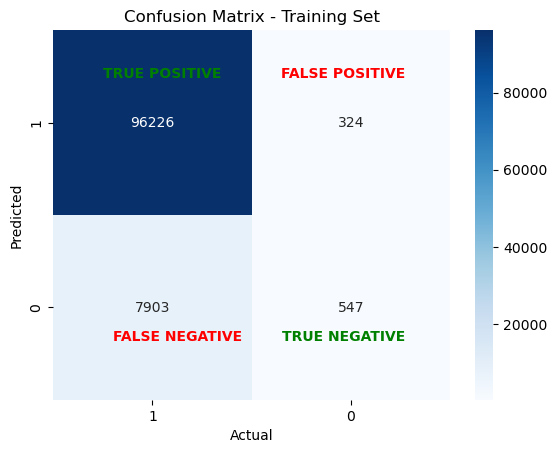

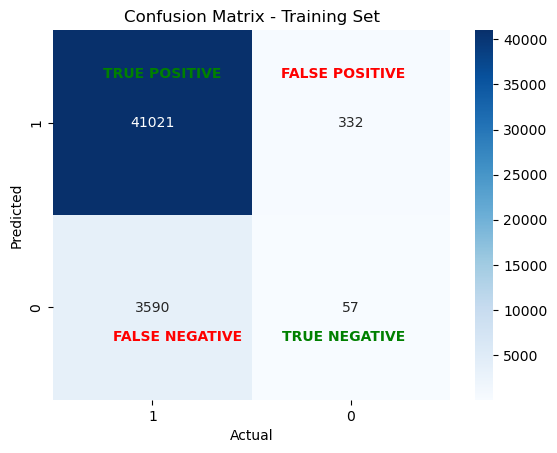

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

# Scaling
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)

# Creating KNN with 5 Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn.fit(X_train, y_train)

# Making predictions
y_pred_val = knn.predict(X_val)
y_pred_train = knn.predict(X_train)

# Calculating accuracy and confusion matrix
knn_accuracy_train = accuracy_score(y_train, y_pred_train)
knn_accuracy_val = accuracy_score(y_val, y_pred_val)
print("Accuracy of Training Model:", knn_accuracy_train)
print("Accuracy of Validation Model:", knn_accuracy_val)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train, y_pred_train))
print('Validation confusion matrix:\n', confusion_matrix(y_val, y_pred_val))

cm_train1 = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train1, annot=True, fmt='d', cmap='Blues', yticklabels=['1', '0'], xticklabels=['1', '0'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - Training Set')
plt.text(0.25, 0.2, f'TRUE POSITIVE ', ha='left', va='top', color='green', fontweight='bold')
plt.text(1.8, 0.2, f'FALSE POSITIVE ', ha='right', va='top', color='red', fontweight='bold')
plt.text(0.3, 1.7, f'FALSE NEGATIVE ', ha='left', va='bottom', color='red', fontweight='bold')
plt.text(1.8, 1.7, f'TRUE NEGATIVE ', ha='right', va='bottom', color='green', fontweight='bold')
plt.show()


cm_val1 = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm_val1, annot=True, fmt='d', cmap='Blues', yticklabels=['1', '0'], xticklabels=['1', '0'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - Training Set')
plt.text(0.25, 0.2, f'TRUE POSITIVE ', ha='left', va='top', color='green', fontweight='bold')
plt.text(1.8, 0.2, f'FALSE POSITIVE ', ha='right', va='top', color='red', fontweight='bold')
plt.text(0.3, 1.7, f'FALSE NEGATIVE ', ha='left', va='bottom', color='red', fontweight='bold')
plt.text(1.8, 1.7, f'TRUE NEGATIVE ', ha='right', va='bottom', color='green', fontweight='bold')
plt.show()


## <a name = "initexp18"> 4.2 KNN Model (with K = 3) on Cleaned App_train Dataframe

Accuracy of Training Model: 0.9286
Accuracy of Validation Model: 0.9014666666666666

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[95786   764]
 [ 6733  1717]]
Validation confusion matrix:
 [[40433   920]
 [ 3514   133]]


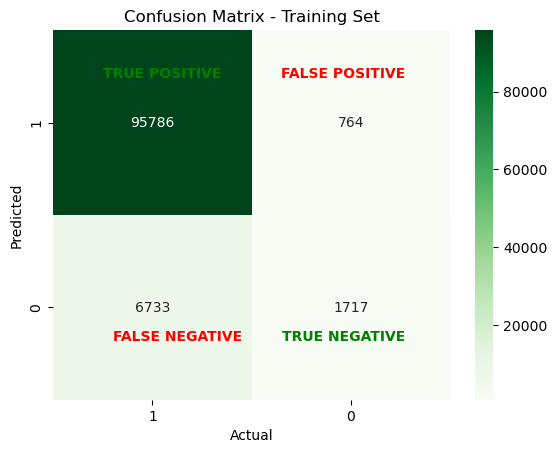

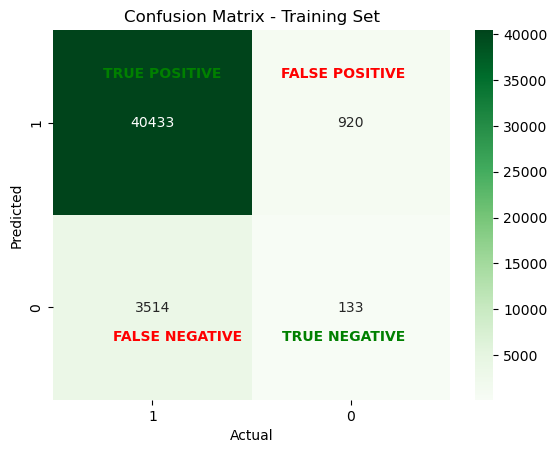

In [40]:
from sklearn.metrics import confusion_matrix

# Creating KNN with 3 Neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn.fit(X_train, y_train)

# Making predictions
y_pred_val = knn.predict(X_val)
y_pred_train = knn.predict(X_train)

# Calculating accuracy and confusion matrix
knn2_accuracy_train = accuracy_score(y_train, y_pred_train)
knn2_accuracy_val = accuracy_score(y_val, y_pred_val)
print("Accuracy of Training Model:", knn2_accuracy_train)
print("Accuracy of Validation Model:", knn2_accuracy_val)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train, y_pred_train))
print('Validation confusion matrix:\n', confusion_matrix(y_val, y_pred_val))


cm_train2 = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train2, annot=True, fmt='d', cmap='Greens', yticklabels=['1', '0'], xticklabels=['1', '0'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - Training Set')
plt.text(0.25, 0.2, f'TRUE POSITIVE ', ha='left', va='top', color='green', fontweight='bold')
plt.text(1.8, 0.2, f'FALSE POSITIVE ', ha='right', va='top', color='red', fontweight='bold')
plt.text(0.3, 1.7, f'FALSE NEGATIVE ', ha='left', va='bottom', color='red', fontweight='bold')
plt.text(1.8, 1.7, f'TRUE NEGATIVE ', ha='right', va='bottom', color='green', fontweight='bold')
plt.show()


cm_val2 = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm_val2, annot=True, fmt='d', cmap='Greens', yticklabels=['1', '0'], xticklabels=['1', '0'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - Training Set')
plt.text(0.25, 0.2, f'TRUE POSITIVE ', ha='left', va='top', color='green', fontweight='bold')
plt.text(1.8, 0.2, f'FALSE POSITIVE ', ha='right', va='top', color='red', fontweight='bold')
plt.text(0.3, 1.7, f'FALSE NEGATIVE ', ha='left', va='bottom', color='red', fontweight='bold')
plt.text(1.8, 1.7, f'TRUE NEGATIVE ', ha='right', va='bottom', color='green', fontweight='bold')
plt.show()

# **Both of these models were too accurate, lets try balancing the target variable in the dataframe.**

## <a name = "initexp19"> 4.3 KNN Model (with K = 3) on  App_train Dataframe with Sampling

**Implementing Upsampling & Downsampling techniques, such as the Synthetic Minority Over-sampling Technique (SMOTE) for upsampling, or random undersampling, to address imbalanced target variables.**

Accuracy of Training Model: 0.8833288571997886
Accuracy of Validation Model: 0.6630533755365737

Training & Validation Confusion Matrices:
Training   confusion matrix:
 [[54801 11157]
 [ 2310 47159]]
Validation confusion matrix:
 [[58135 26669]
 [ 4415  3033]]


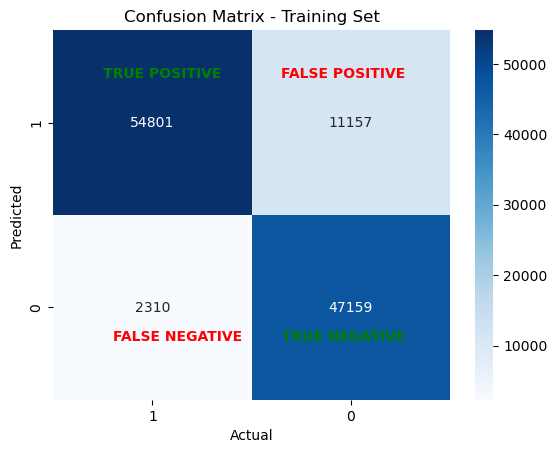

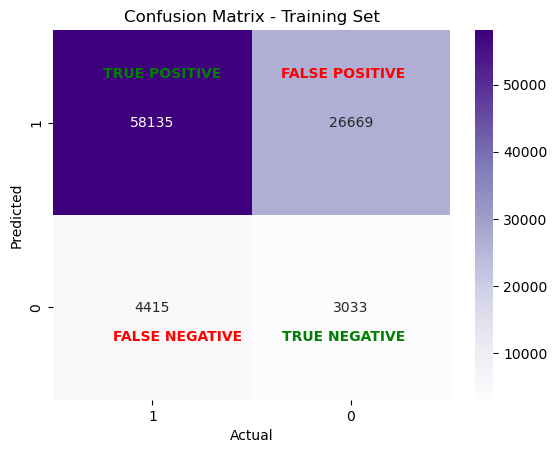

In [41]:
from sklearn.model_selection import train_test_split

# Performing one-hot encoding on categorical columns
categorical_columns = app_train_cleaned.select_dtypes(include=['object']).columns
app_train_cleaned_encoded = pd.get_dummies(app_train_cleaned, columns=categorical_columns)

# Separating features and target variable
X = app_train_cleaned_encoded.drop('TARGET', axis=1)
y = app_train_cleaned_encoded['TARGET']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Applying oversampling and undersampling
oversampler = SMOTE(sampling_strategy=0.25)
undersampler = RandomUnderSampler(sampling_strategy=0.75)

X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_oversampled, y_train_oversampled)

# Creating KNN with 3 Neighbors
knn_best = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn_best.fit(X_train_resampled, y_train_resampled)

# Making predictions
y_pred_val = knn_best.predict(X_val)
y_pred_train = knn_best.predict(X_train_resampled)

# Calculating accuracy and confusion matrix
knn_accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
knn_accuracy_val = accuracy_score(y_val, y_pred_val)
print("Accuracy of Training Model:", knn_accuracy_train)
print("Accuracy of Validation Model:", knn_accuracy_val)
print('')
print('Training & Validation Confusion Matrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train_resampled, y_pred_train))
print('Validation confusion matrix:\n', confusion_matrix(y_val, y_pred_val))


cm_train3 = confusion_matrix(y_train_resampled, y_pred_train)
sns.heatmap(cm_train3, annot=True, fmt='d', cmap='Blues', yticklabels=['1', '0'], xticklabels=['1', '0'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - Training Set')
plt.text(0.25, 0.2, f'TRUE POSITIVE ', ha='left', va='top', color='green', fontweight='bold')
plt.text(1.8, 0.2, f'FALSE POSITIVE ', ha='right', va='top', color='red', fontweight='bold')
plt.text(0.3, 1.7, f'FALSE NEGATIVE ', ha='left', va='bottom', color='red', fontweight='bold')
plt.text(1.8, 1.7, f'TRUE NEGATIVE ', ha='right', va='bottom', color='green', fontweight='bold')
plt.show()


cm_val3 = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm_val3, annot=True, fmt='d', cmap='Purples', yticklabels=['1', '0'], xticklabels=['1', '0'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - Training Set')
plt.text(0.25, 0.2, f'TRUE POSITIVE ', ha='left', va='top', color='green', fontweight='bold')
plt.text(1.8, 0.2, f'FALSE POSITIVE ', ha='right', va='top', color='red', fontweight='bold')
plt.text(0.3, 1.7, f'FALSE NEGATIVE ', ha='left', va='bottom', color='red', fontweight='bold')
plt.text(1.8, 1.7, f'TRUE NEGATIVE ', ha='right', va='bottom', color='green', fontweight='bold')
plt.show()


This model looks a lot more realistic than the model before. Upsampling the data and then downsampling it, seems to be working.

## <a name = "initexp20"> 4.4 KNN Model (with K = 3) on Cleaned App_train_bureau Dataframe

Accuracy of Training Model: 0.9537619047619048
Accuracy of Validation Model: 0.9176888888888889

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[95954   741]
 [ 4114  4191]]
Validation confusion matrix:
 [[40622   882]
 [ 2822   674]]


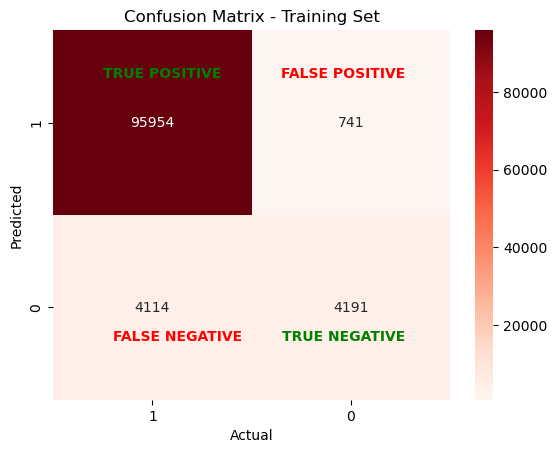

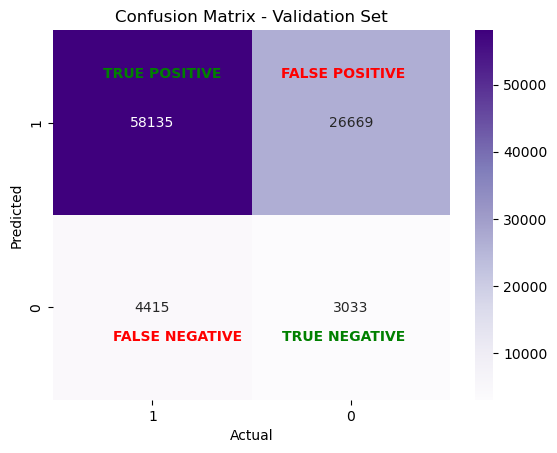

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Sub-sampling random 150,000 rows from the dataframe
train_bureau_sample = app_train_bureau_clean.sample(n=150000, random_state=42)

# Performing one-hot encoding on categorical columns
categorical_columns_b = train_bureau_sample.select_dtypes(include=['object']).columns
app_train_bureau_clean_encoded = pd.get_dummies(train_bureau_sample, columns=categorical_columns_b)

# Separating features and target variable
Xb = app_train_bureau_clean_encoded.drop('TARGET', axis=1)
yb = app_train_bureau_clean_encoded['TARGET']

# Splitting the data into training and validation sets
Xb_train, Xb_val, yb_train, yb_val = train_test_split(Xb, yb, test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
Xb_train_scaled = scaler.fit_transform(Xb_train)
Xb_val_scaled = scaler.transform(Xb_val)

# Creating KNN with 5 Neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn.fit(Xb_train_scaled, yb_train)

# Making predictions
yb_pred_val = knn.predict(Xb_val_scaled)
yb_pred_train = knn.predict(Xb_train_scaled)

# Calculating accuracy and confusion matrix
knn_accuracy_trainb = accuracy_score(yb_train, yb_pred_train)
knn_accuracy_valb = accuracy_score(yb_val, yb_pred_val)
print("Accuracy of Training Model:", knn_accuracy_trainb)
print("Accuracy of Validation Model:", knn_accuracy_valb)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(yb_train, yb_pred_train))
print('Validation confusion matrix:\n', confusion_matrix(yb_val, yb_pred_val))



cm_train4 = confusion_matrix(yb_train, yb_pred_train)
sns.heatmap(cm_train4, annot=True, fmt='d', cmap='Reds', yticklabels=['1', '0'], xticklabels=['1', '0'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - Training Set')
plt.text(0.25, 0.2, f'TRUE POSITIVE ', ha='left', va='top', color='green', fontweight='bold')
plt.text(1.8, 0.2, f'FALSE POSITIVE ', ha='right', va='top', color='red', fontweight='bold')
plt.text(0.3, 1.7, f'FALSE NEGATIVE ', ha='left', va='bottom', color='red', fontweight='bold')
plt.text(1.8, 1.7, f'TRUE NEGATIVE ', ha='right', va='bottom', color='green', fontweight='bold')
plt.show()


cm_val4 = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm_val4, annot=True, fmt='d', cmap='Purples', yticklabels=['1', '0'], xticklabels=['1', '0'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - Validation Set')
plt.text(0.25, 0.2, f'TRUE POSITIVE ', ha='left', va='top', color='green', fontweight='bold')
plt.text(1.8, 0.2, f'FALSE POSITIVE ', ha='right', va='top', color='red', fontweight='bold')
plt.text(0.3, 1.7, f'FALSE NEGATIVE ', ha='left', va='bottom', color='red', fontweight='bold')
plt.text(1.8, 1.7, f'TRUE NEGATIVE ', ha='right', va='bottom', color='green', fontweight='bold')
plt.show()

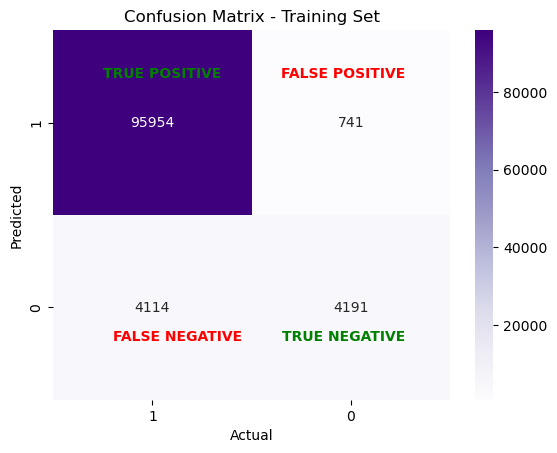

In [43]:
cm_train4 = confusion_matrix(yb_train, yb_pred_train)
sns.heatmap(cm_train4, annot=True, fmt='d', cmap='Purples', yticklabels=['1', '0'], xticklabels=['1', '0'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - Training Set')
plt.text(0.25, 0.2, f'TRUE POSITIVE ', ha='left', va='top', color='green', fontweight='bold')
plt.text(1.8, 0.2, f'FALSE POSITIVE ', ha='right', va='top', color='red', fontweight='bold')
plt.text(0.3, 1.7, f'FALSE NEGATIVE ', ha='left', va='bottom', color='red', fontweight='bold')
plt.text(1.8, 1.7, f'TRUE NEGATIVE ', ha='right', va='bottom', color='green', fontweight='bold')
plt.show()

## <a name = "initexp21"> 4.5 KNN Model (with K = 5) on Cleaned App_train_bureau Dataframe

In [44]:
from sklearn.metrics import confusion_matrix

# Creating KNN with 3 Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn.fit(Xb_train_scaled, yb_train)

# Making predictions
yb_pred_val = knn.predict(Xb_val_scaled)
yb_pred_train = knn.predict(Xb_train_scaled)

# Calculating accuracy and confusion matrix
knn2_accuracy_trainb = accuracy_score(yb_train, yb_pred_train)
knn2_accuracy_valb = accuracy_score(yb_val, yb_pred_val)
print("Accuracy of Training Model:", knn2_accuracy_trainb)
print("Accuracy of Validation Model:", knn2_accuracy_valb)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(yb_train, yb_pred_train))
print('Validation confusion matrix:\n', confusion_matrix(yb_val, yb_pred_val))



Accuracy of Training Model: 0.9349619047619048
Accuracy of Validation Model: 0.9197555555555555

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[96256   439]
 [ 6390  1915]]
Validation confusion matrix:
 [[41099   405]
 [ 3206   290]]


Like with the models on the app_train dataframed,both of these models were too accurate. Lets also try balancing the target variable in this dataframe.

## <a name = "initexp22"> 4.6 KNN Model (with K = 3) on  App_train Dataframe with Sampling

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Sub-sampling random 150,000 rows from the dataframe
train_bureau_sample = app_train_bureau_clean.sample(n=150000, random_state=42)

# Performing one-hot encoding on categorical columns
categorical_columns_b = train_bureau_sample.select_dtypes(include=['object']).columns
app_train_bureau_clean_encoded = pd.get_dummies(train_bureau_sample, columns=categorical_columns_b)

# Separating features and target variable
Xb = app_train_bureau_clean_encoded.drop('TARGET', axis=1)
yb = app_train_bureau_clean_encoded['TARGET']

# Splitting the data into training and validation sets
Xb_train, Xb_val, yb_train, yb_val = train_test_split(Xb, yb, test_size=0.3, random_state=42)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Applying oversampling and undersampling
oversampler = SMOTE(sampling_strategy=0.25)
undersampler = RandomUnderSampler(sampling_strategy=0.75)

Xb_train_oversampled, yb_train_oversampled = oversampler.fit_resample(Xb_train, yb_train)
Xb_train_resampled, yb_train_resampled = undersampler.fit_resample(Xb_train_oversampled, yb_train_oversampled)

# Creating KNN with 5 Neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn.fit(Xb_train_resampled, yb_train_resampled)

# Making predictions
yb_pred_val = knn.predict(Xb_val)
yb_pred_train = knn.predict(Xb_train_resampled)

# Calculating accuracy and confusion matrix
knn_accuracy_trainb = accuracy_score(yb_train_resampled, yb_pred_train)
knn_accuracy_valb = accuracy_score(yb_val, yb_pred_val)
print("Accuracy of Training Model:", knn_accuracy_trainb)
print("Accuracy of Validation Model:", knn_accuracy_valb)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(yb_train_resampled, yb_pred_train))
print('Validation confusion matrix:\n', confusion_matrix(yb_val, yb_pred_val))

Accuracy of Training Model: 0.8927362019750722
Accuracy of Validation Model: 0.6723555555555556

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[26990  5240]
 [  810 23363]]
Validation confusion matrix:
 [[28706 12798]
 [ 1946  1550]]


## <a name = "initexp23"> 4.7 KNN Results

The KNN model with the best results is the KNN with 3 nearest neighbors using the app_train_bureau_clean dataframe. Its accuracy using the training set was 89% and 67% on the validation set. Both accuracies are the highest compared to the other models

# <a name = "initexp24"> 5. Light Gradient Boosting Model

## <a name = "initexp25"> 5.1 LGB Model on Cleaned App_train Dataframe

In [48]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 7.2 MB/s eta 0:00:00


In [49]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re

# Performing one-hot encoding on categorical columns
categorical_columns = app_train_cleaned.select_dtypes(include=['object']).columns
app_train_cleaned_encoded = pd.get_dummies(app_train_cleaned, columns=categorical_columns)

# Separating features and target variable
X = app_train_cleaned_encoded.drop('TARGET', axis=1)
y = app_train_cleaned_encoded['TARGET']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Removing special characters from column names
clean_names_train = [re.sub(r'\W+', '_', feature) for feature in X_train.columns]
clean_names_val = [re.sub(r'\W+', '_', feature) for feature in X_val.columns]

# Assigning the clean column names to the dataframes
X_train.columns = clean_names_train
X_val.columns = clean_names_val


# Creating a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# Seting the parameters for the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.5,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'force_row_wise': True
}

# Training the LightGBM model
model_train1 = lgb.train(params, train_data, num_boost_round=100)
model_val1 = lgb.train(params, val_data, num_boost_round=100)

# Making predictions on the testing set
y_pred_train = model_train1.predict(X_train)
y_pred_val = model_val1.predict(X_val)

# Converting probabilities to binary predictions
y_pred_train_binary = [1 if p >= 0.5 else 0 for p in y_pred_train]
y_pred_val_binary = [1 if p >= 0.5 else 0 for p in y_pred_val]

# Calculating accuracy and confusion matrix
accuracy_train = accuracy_score(y_train, y_pred_train_binary)
accuracy_val = accuracy_score(y_val, y_pred_val_binary)
print("Accuracy of Training Model:", accuracy_train)
print("Accuracy of Validation Model:", accuracy_val)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train, y_pred_train_binary))
print('Validation confusion matrix:\n', confusion_matrix(y_val, y_pred_val_binary))

Accuracy of Training Model: 0.9226495210309681
Accuracy of Validation Model: 0.9488249577244938

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[195958   1920]
 [ 14730   2646]]
Validation confusion matrix:
 [[84081   723]
 [ 3998  3450]]


Based on these results, this model would just guess the targt to be 0 for ever row. Therefore, it could be better.

## <a name = "initexp26"> 5.2 LGB Model on Cleaned App_train Dataframe with Sampling

In [50]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re

# Performing one-hot encoding on categorical columns
categorical_columns = app_train_cleaned.select_dtypes(include=['object']).columns
app_train_cleaned_encoded = pd.get_dummies(app_train_cleaned, columns=categorical_columns)

# Separating features and target variable
X = app_train_cleaned_encoded.drop('TARGET', axis=1)
y = app_train_cleaned_encoded['TARGET']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Removing special characters from column names
clean_names_train = [re.sub(r'\W+', '_', feature) for feature in X_train.columns]
clean_names_val = [re.sub(r'\W+', '_', feature) for feature in X_val.columns]

# Assigning the clean column names to the dataframes
X_train.columns = clean_names_train
X_val.columns = clean_names_val

# Applying oversampling and undersampling
oversampler = SMOTE(sampling_strategy=0.25)
undersampler = RandomUnderSampler(sampling_strategy=0.75)

X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_oversampled, y_train_oversampled)

X_val_oversampled, y_val_oversampled = oversampler.fit_resample(X_val, y_val)
X_val_resampled, y_val_resampled = undersampler.fit_resample(X_val_oversampled, y_val_oversampled)


# Creating a LightGBM dataset
train_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)
val_data = lgb.Dataset(X_val_resampled, label=y_val_resampled)

# Seting the parameters for the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.5,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'force_row_wise': True
}

# Training the LightGBM model
model_train = lgb.train(params, train_data, num_boost_round=500)
model_val = lgb.train(params, val_data, num_boost_round=500)

# Making predictions on the testing set
y_pred_train = model_train.predict(X_train_resampled)
y_pred_val = model_val.predict(X_val_resampled)

# Converting probabilities to binary predictions
y_pred_train_binary = [1 if p >= 0.5 else 0 for p in y_pred_train]
y_pred_val_binary = [1 if p >= 0.5 else 0 for p in y_pred_val]

# Calculating accuracy and confusion matrix
accuracy_train = accuracy_score(y_train_resampled, y_pred_train_binary)
accuracy_val = accuracy_score(y_val_resampled, y_pred_val_binary)
print("Accuracy of Training Model:", accuracy_train)
print("Accuracy of Validation Model:", accuracy_val)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train_resampled, y_pred_train_binary))
print('Validation confusion matrix:\n', confusion_matrix(y_val_resampled, y_pred_val_binary))

Accuracy of Training Model: 0.9975655609172898
Accuracy of Validation Model: 1.0

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[65930    28]
 [  253 49216]]
Validation confusion matrix:
 [[28268     0]
 [    0 21201]]


## <a name = "initexp27"> 5.3 LGB Model on Cleaned App_train_bureau Dataframe

In [51]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re

# Removing special characters from column names
clean_names_trainb = [re.sub(r'\W+', '_', feature) for feature in Xb_train.columns]
clean_names_valb = [re.sub(r'\W+', '_', feature) for feature in Xb_val.columns]

# Assigning the clean column names to your dataset
Xb_train.columns = clean_names_trainb
Xb_val.columns = clean_names_valb


# Creating a LightGBM dataset
trainb_data = lgb.Dataset(Xb_train, label=yb_train)
valb_data = lgb.Dataset(Xb_val, label=yb_val)

# Seting the parameters for the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.5,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'force_row_wise': True
}

# Training the LightGBM model
model_trainb = lgb.train(params, trainb_data, num_boost_round=100)
model_valb = lgb.train(params, valb_data, num_boost_round=100)

# Making predictions on the testing set
yb_pred_train = model_trainb.predict(Xb_train)
yb_pred_val = model_valb.predict(Xb_val)

# Converting probabilities to binary predictions
yb_pred_train_binary = [1 if p >= 0.5 else 0 for p in yb_pred_train]
yb_pred_val_binary = [1 if p >= 0.5 else 0 for p in yb_pred_val]

# Calculating accuracy and confusion matrix
accuracy_trainb = accuracy_score(yb_train, yb_pred_train_binary)
accuracy_valb = accuracy_score(yb_val, yb_pred_val_binary)
print("Accuracy of Training Model:", accuracy_trainb)
print("Accuracy of Validation Model:", accuracy_valb)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(yb_train, yb_pred_train_binary))
print('Validation confusion matrix:\n', confusion_matrix(yb_val, yb_pred_val_binary))

Accuracy of Training Model: 0.9504
Accuracy of Validation Model: 0.9956666666666667

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[95612  1083]
 [ 4125  4180]]
Validation confusion matrix:
 [[41478    26]
 [  169  3327]]


## <a name = "initexp28"> 5.4 LGB Model on Cleaned App_train_bureau Dataframe with Sampling

In [52]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Performing one-hot encoding on categorical columns
categorical_columns_b = train_bureau_sample.select_dtypes(include=['object']).columns
app_train_bureau_clean_encoded = pd.get_dummies(train_bureau_sample, columns=categorical_columns_b)

# Separating features and target variable
Xb = app_train_bureau_clean_encoded.drop('TARGET', axis=1)
yb = app_train_bureau_clean_encoded['TARGET']

# Splitting the data into training and validation sets
Xb_train, Xb_val, yb_train, yb_val = train_test_split(Xb, yb, test_size=0.3, random_state=42)

# Removing special characters from column names
clean_names_trainb = [re.sub(r'\W+', '_', feature) for feature in Xb_train.columns]
clean_names_valb = [re.sub(r'\W+', '_', feature) for feature in Xb_val.columns]

# Assigning the clean column names to the dataframes
Xb_train.columns = clean_names_trainb
Xb_val.columns = clean_names_valb

# Applying oversampling and undersampling
oversampler = SMOTE(sampling_strategy=0.25)
undersampler = RandomUnderSampler(sampling_strategy=0.75)

Xb_train_oversampled, yb_train_oversampled = oversampler.fit_resample(Xb_train, yb_train)
Xb_train_resampled, yb_train_resampled = undersampler.fit_resample(Xb_train_oversampled, yb_train_oversampled)

Xb_val_oversampled, yb_val_oversampled = oversampler.fit_resample(Xb_val, yb_val)
Xb_val_resampled, yb_val_resampled = undersampler.fit_resample(Xb_val_oversampled, yb_val_oversampled)


# Creating a LightGBM dataset
trainb_data = lgb.Dataset(Xb_train_resampled, label=yb_train_resampled)
valb_data = lgb.Dataset(Xb_val_resampled, label=yb_val_resampled)

# Seting the parameters for the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.5,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'force_row_wise': True
}

# Training the LightGBM model
model_trainb1 = lgb.train(params, trainb_data, num_boost_round=100)
model_valb1 = lgb.train(params, valb_data, num_boost_round=100)

# Making predictions on the testing set
yb_pred_train = model_trainb1.predict(Xb_train_resampled)
yb_pred_val = model_valb1.predict(Xb_val_resampled)

# Converting probabilities to binary predictions
yb_pred_train_binary = [1 if p >= 0.5 else 0 for p in yb_pred_train]
yb_pred_val_binary = [1 if p >= 0.5 else 0 for p in yb_pred_val]

# Calculating accuracy and confusion matrix
accuracy_trainb = accuracy_score(yb_train_resampled, yb_pred_train_binary)
accuracy_valb = accuracy_score(yb_val_resampled, yb_pred_val_binary)
print("Accuracy of Training Model:", accuracy_trainb)
print("Accuracy of Validation Model:", accuracy_valb)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(yb_train_resampled, yb_pred_train_binary))
print('Validation confusion matrix:\n', confusion_matrix(yb_val_resampled, yb_pred_val_binary))

Accuracy of Training Model: 0.9651791571370317
Accuracy of Validation Model: 0.998636926889715

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[31940   290]
 [ 1674 22499]]
Validation confusion matrix:
 [[13828     6]
 [   27 10349]]


## <a name = "initexp29"> 5.5 LGB Results

In [53]:
# predicting model on the app_test_cleaned dataframe

categorical_columns_test = app_test_cleaned.select_dtypes(include=['object']).columns
app_test_cleaned_encoded = pd.get_dummies(app_test_cleaned, columns=categorical_columns_test)

results2 = pd.DataFrame({'SK_ID_CURR': app_test_cleaned_encoded.index, 'TARGET': model_train1.predict(app_test_cleaned_encoded,  predict_disable_shape_check=True)})
print(results2) # Score = 0.65

       SK_ID_CURR    TARGET
0          100001  0.004428
1          100005  0.121603
2          100013  0.000297
3          100028  0.003466
4          100038  0.119046
...           ...       ...
48739      456221  0.004546
48740      456222  0.028829
48741      456223  0.058085
48742      456224  0.084603
48743      456250  0.089862

[48744 rows x 2 columns]


In [54]:
results2.to_csv('out_lgb_bur.csv', index=False)

In [55]:
# predicting model on the app_test_cleaned dataframe

categorical_columns_test = app_test_cleaned.select_dtypes(include=['object']).columns
app_test_cleaned_encoded = pd.get_dummies(app_test_cleaned, columns=categorical_columns_test)

results = pd.DataFrame({'SK_ID_CURR': app_test_cleaned_encoded.index, 'TARGET': model_train.predict(app_test_cleaned_encoded,  predict_disable_shape_check=True)})
print(results) # Score = 0.65

       SK_ID_CURR    TARGET
0          100001  0.000511
1          100005  0.233521
2          100013  0.005065
3          100028  0.005958
4          100038  0.140732
...           ...       ...
48739      456221  0.004313
48740      456222  0.199419
48741      456223  0.034034
48742      456224  0.002638
48743      456250  0.272782

[48744 rows x 2 columns]


In [56]:
results.to_csv('out_lgb.csv', index=False)

![Kaggle score- LGB.png](LGB.jpeg)

The LGB model with the best results is the LGB with 50 leaves and learning rate of 0.5 using the app_train_cleaned dataframe with sampling. Its accuracy using the training set was 99.8% and 100% on the validation set.
The kaggle score for this best model is 0.65.

# <a name = "initexp30"> 6. Gradient Boosting Model

## <a name = "initexp31"> 6.1 Gradient Boosting Model on Cleaned App_train Dataframe

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

missing_columns = ['NAME_INCOME_TYPE_Maternity_leave', 'NAME_FAMILY_STATUS_Unknown']

X_train_resampled2 = X_train_resampled.drop(missing_columns, axis=1)
X_val_resampled2 = X_val_resampled.drop(missing_columns, axis=1)

# Training a model on the training and validation set
GB_train_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=3, random_state=42)
GB_train_model.fit(X_train_resampled2, y_train_resampled)

GB_val_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=3, random_state=42)
GB_val_model.fit(X_val_resampled2, y_val_resampled)

# Making predictions
GB_train_pred = GB_train_model.predict(X_train_resampled2)
GB_val_pred = GB_val_model.predict(X_val_resampled2)

# Calculating accuracy and confusion matrix
train_accuracy = accuracy_score(y_train_resampled, GB_train_pred)
val_accuracy = accuracy_score(y_val_resampled, GB_val_pred)
print("Accuracy of Training Model:", train_accuracy)
print("Accuracy of Validation Model:", val_accuracy)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train_resampled, GB_train_pred))
print('Validation confusion matrix:\n', confusion_matrix(y_val_resampled, GB_val_pred))

Accuracy of Training Model: 0.8686875687664065
Accuracy of Validation Model: 0.8809961794254988

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[63702  2256]
 [12901 36568]]
Validation confusion matrix:
 [[27380   888]
 [ 4999 16202]]


## <a name = "initexp32"> 6.2 Gradient Boosting Results

In [58]:
app_test_cleaned_encoded2 = pd.get_dummies(app_test_cleaned, columns=categorical_columns_test)
app_test_cleaned_encoded_aligned = app_test_cleaned_encoded2.reindex(columns=X_train_resampled2.columns, fill_value=0)

results_gb = pd.DataFrame({'SK_ID_CURR': app_test_cleaned_encoded2.index, 'TARGET': GB_train_model.predict(app_test_cleaned_encoded_aligned)})


In [59]:
results_gb.to_csv('out_gb.csv', index=False)

### **The kaggle score for this Gradient Boosting model is 0.66**

In [60]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Performing one-hot encoding on categorical columns
categorical_columns = app_train_cleaned.select_dtypes(include=['object']).columns
app_train_cleaned_encoded = pd.get_dummies(app_train_cleaned, columns=categorical_columns)

# Separating features and target variable
X = app_train_cleaned_encoded.drop('TARGET', axis=1)
y = app_train_cleaned_encoded['TARGET']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Removing special characters from column names
clean_names_train = [re.sub(r'\W+', '_', feature) for feature in X_train.columns]
clean_names_val = [re.sub(r'\W+', '_', feature) for feature in X_val.columns]

# Assigning the clean column names to the dataframes
X_train.columns = clean_names_train
X_val.columns = clean_names_val

# Applying oversampling to the training set
oversampler = SMOTE(sampling_strategy=0.25)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Applying undersampling to the validation set
undersampler = RandomUnderSampler(sampling_strategy=0.75)
X_val_undersampled, y_val_undersampled = undersampler.fit_resample(X_val, y_val)

# Creating a LightGBM dataset
train_data = lgb.Dataset(X_train_oversampled, label=y_train_oversampled)
val_data = lgb.Dataset(X_val_undersampled, label=y_val_undersampled)

# Seting the parameters for the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.5,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'force_row_wise': True
}

# Training the LightGBM model
model_train = lgb.train(params, train_data, num_boost_round=500)
model_val = lgb.train(params, val_data, num_boost_round=500)

# Making predictions on the validation set
y_pred_val = model_val.predict(X_val_undersampled)
y_pred_val_binary = [1 if p >= 0.5 else 0 for p in y_pred_val]

# Calculating accuracy and confusion matrix
accuracy_val = accuracy_score(y_val_undersampled, y_pred_val_binary)
print("Accuracy of Validation Model:", accuracy_val)
print('')
print('Validation Confusion Matrix:')
print(confusion_matrix(y_val_undersampled, y_pred_val_binary))

# predicting model on the app_test_cleaned dataframe
categorical_columns_test = app_test_cleaned.select_dtypes(include=['object']).columns
app_test_cleaned_encoded = pd.get_dummies(app_test_cleaned, columns=categorical_columns_test)

results = pd.DataFrame({'SK_ID_CURR': app_test_cleaned_encoded.index, 'TARGET': model_train.predict(app_test_cleaned_encoded,  predict_disable_shape_check=True)})
print(results)



Accuracy of Validation Model: 1.0

Validation Confusion Matrix:
[[9930    0]
 [   0 7448]]
       SK_ID_CURR    TARGET
0          100001  0.010063
1          100005  0.090364
2          100013  0.000038
3          100028  0.019686
4          100038  0.610564
...           ...       ...
48739      456221  0.001953
48740      456222  0.007038
48741      456223  0.149653
48742      456224  0.000700
48743      456250  0.115277

[48744 rows x 2 columns]


In [61]:
results.to_csv('out_lgb2.csv', index=False)

# <a name = "initexp33"> 7. Comparison of LGB & GB results

In [62]:
results.to_csv("Submission.csv", index=False)

In the end the best model was the light gradient boosting one using the upsampled then downsampled data. Its accuracy using the training set was 99.8% and 100% on the validation set.
The kaggle score for this best model is 0.65.

# <a name = "initexp34">8. Naive Bayes



Naive Bayes Model for this kind of problem gives us speedy training of datasets. Naive Bayes models are easy to interpret and understand. The probabilistic nature of the model allows for straightforward interpretation of feature importance and contribution to the target variable. However, Naive Bayes assumes that all features are independent of each other given the target variable. This assumption may not hold true in real-world scenarios, which can limit the model's predictive accuracy.

This cell performs grid search with cross-validation to systematically search for the best hyperparameters for the Naive Bayes model. It explores different combinations of hyperparameters defined in the 'param_grid' and evaluates their performance using the accuracy metric. The outcome is the best set of hyperparameters that optimize the model's accuracy on the training data. I wanted to point out what does these lines of codes do: 'cv=5': The number of cross-validation folds to be used during the grid search. In this case, 5-fold cross-validation is performed. 'scoring='accuracy'': The evaluation metric used to assess the performance of different parameter combinations. Here, the accuracy score is used.

We received a train accuracy of 58% and test accuracy 57%. The run time of this model was 7.87 seconds

In [63]:
def NB_model(app_train_cleaned):
    categorical_columns = app_train_cleaned.select_dtypes(include=['object']).columns

    app_train_cleaned_encoded = pd.get_dummies(app_train_cleaned, columns=categorical_columns)

    app_train_cleaned_encoded_copy = app_train_cleaned_encoded.copy()
    missing_columns = ['NAME_INCOME_TYPE_Maternity leave', 'NAME_FAMILY_STATUS_Unknown']

    # Separating features and target variable
    X = app_train_cleaned_encoded_copy.drop('TARGET', axis=1)
    y = app_train_cleaned_encoded_copy['TARGET']
    undersampler = RandomUnderSampler(sampling_strategy=0.75)
    X, y = undersampler.fit_resample(X, y)

    # Splitting the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train = X_train.drop(missing_columns, axis=1)
    X_val = X_val.drop(missing_columns, axis=1)
    param_grid = {
    'var_smoothing': np.logspace(-9, 0, num=10)
}
    naive_bayes = GaussianNB()
    grid_search = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print('Best Params: ', best_params)
    model = grid_search.best_estimator_

    y_pred = model.predict(X_val)
    train_y_pred = model.predict(X_train)

    print('Train Accuracy:', accuracy_score(y_train, train_y_pred))
    print('Train ROC AUC score:', roc_auc_score(y_train, train_y_pred))

    print('Test Accuracy:', accuracy_score(y_val, y_pred))
    print('Test ROC AUC score:', roc_auc_score(y_val, y_pred))
    print(' Test Confusion Matrix:\n')
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
    print('Training   confusion matrix:\n', confusion_matrix(y_val, y_pred))
    disp.plot()
    plt.show()

    print('Test Classification Report:\n', classification_report(y_val, y_pred))

    categorical_columns_test = app_test_cleaned.select_dtypes(include=['object']).columns

    app_test_cleaned_encoded = pd.get_dummies(app_test_cleaned, columns=categorical_columns_test)

    results_nb = pd.DataFrame({'SK_ID_CURR': app_test_cleaned_encoded.index, 'TARGET': model.predict(app_test_cleaned_encoded)})



    return model, results_nb

Best Params:  {'var_smoothing': 1e-09}
Train Accuracy: 0.5808607719817487
Train ROC AUC score: 0.5843203373623991
Test Accuracy: 0.5776025781205041
Test ROC AUC score: 0.582134556197098
 Test Confusion Matrix:

Training   confusion matrix:
 [[5507 4475]
 [2865 4530]]


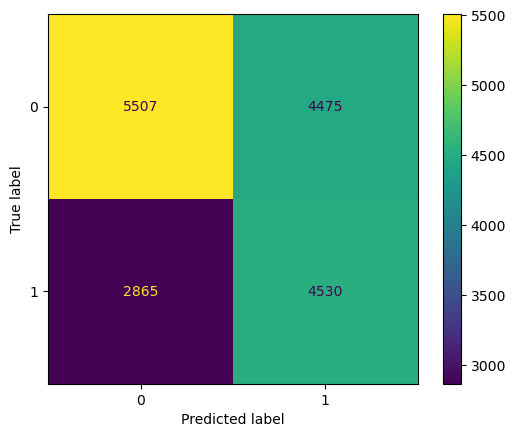

Test Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.55      0.60      9982
           1       0.50      0.61      0.55      7395

    accuracy                           0.58     17377
   macro avg       0.58      0.58      0.58     17377
weighted avg       0.59      0.58      0.58     17377

Logistic Regression Runtime:  8.132031679153442 seconds


In [64]:
nb_start = time.time()
model_nb1, results_nb = NB_model(app_train_cleaned)
nb_end = time.time()
print('Logistic Regression Runtime: ', nb_end - nb_start, 'seconds')

In [65]:
results_nb.to_csv("NaiveBayesSubmission.csv", index=False)

### Kaggle Score for Naive Bayes (0.57)
![Naive Bayes](Naiva_Bayes_IMG.png)

# <a name = "initexp35"> 9.Logistic Regression

Logistic Regression is an appropriate base model as it's commonly used for binary classification tasks. It provides a probability estimate of default risk based on input features, helping identify potential defaulters. In short, it helps predict the likelihood of a borrower defaulting on their home credit, aiding in risk assessment and decision-making processes. \n

We under sampled the train data since it was heavily imbalanced and received a train accuracy of 60% and test accuracy 60% as well. The run time of this model was 2.44 seconds

In [66]:
def logistic_regression_model(app_train_cleaned):
    categorical_columns = app_train_cleaned.select_dtypes(include=['object']).columns

    app_train_cleaned_encoded = pd.get_dummies(app_train_cleaned, columns=categorical_columns)

    app_train_cleaned_encoded_copy = app_train_cleaned_encoded.copy()
    missing_columns = ['NAME_INCOME_TYPE_Maternity leave', 'NAME_FAMILY_STATUS_Unknown']

    # Separating features and target variable
    X = app_train_cleaned_encoded_copy.drop('TARGET', axis=1)
    y = app_train_cleaned_encoded_copy['TARGET']
    undersampler = RandomUnderSampler(sampling_strategy=0.75)
    X, y = undersampler.fit_resample(X, y)

    # Splitting the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train = X_train.drop(missing_columns, axis=1)
    X_val = X_val.drop(missing_columns, axis=1)

    X_cols = list(X_train.columns)
    model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning appears
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    train_y_pred = model.predict(X_train)

    print('Train Accuracy:', accuracy_score(y_train, train_y_pred))
    print('Train ROC AUC score:', roc_auc_score(y_train, train_y_pred))

    print('Test Accuracy:', accuracy_score(y_val, y_pred))
    print('Test ROC AUC score:', roc_auc_score(y_val, y_pred))
    print(' Test Confusion Matrix:\n')
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
    print('Training   confusion matrix:\n', confusion_matrix(y_val, y_pred))
    disp.plot()
    plt.show()

    print('Test Classification Report:\n', classification_report(y_val, y_pred))


    importances = pd.DataFrame(data={
        'Attribute': X_cols,
        'Importance': model.coef_[0]
    })
    importances = importances.sort_values(by='Importance', ascending=False)

    print('Feature Importances:')
    print(importances)
    categorical_columns_test = app_test_cleaned.select_dtypes(include=['object']).columns

    app_test_cleaned_encoded = pd.get_dummies(app_test_cleaned, columns=categorical_columns_test)

    results_lg = pd.DataFrame({'SK_ID_CURR': app_test_cleaned_encoded.index, 'TARGET': model.predict(app_test_cleaned_encoded)})



    return model, results_lg

Train Accuracy: 0.6006659267480577
Train ROC AUC score: 0.5593990454397482
Test Accuracy: 0.6090234217644013
Test ROC AUC score: 0.5654482598765675
 Test Confusion Matrix:

Training   confusion matrix:
 [[8566 1416]
 [5378 2017]]


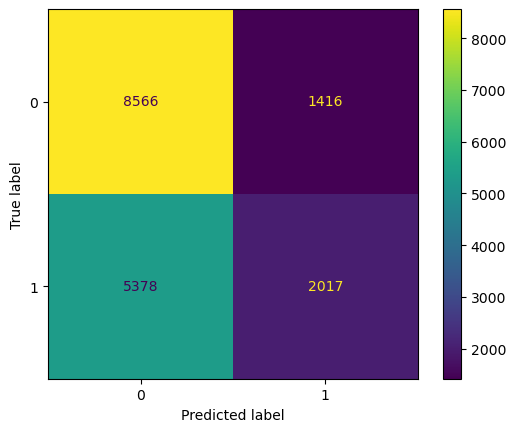

Test Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.86      0.72      9982
           1       0.59      0.27      0.37      7395

    accuracy                           0.61     17377
   macro avg       0.60      0.57      0.54     17377
weighted avg       0.60      0.61      0.57     17377

Feature Importances:
                               Attribute    Importance
32                DAYS_LAST_PHONE_CHANGE  1.944510e-04
9                        DAYS_ID_PUBLISH  2.537011e-05
3                            AMT_ANNUITY  2.050194e-05
8                      DAYS_REGISTRATION  2.039744e-05
2                             AMT_CREDIT  3.350848e-06
..                                   ...           ...
26                          EXT_SOURCE_2 -1.912928e-07
82  NAME_EDUCATION_TYPE_Higher education -1.946240e-07
1                       AMT_INCOME_TOTAL -5.147260e-07
7                          DAYS_EMPLOYED -9.390916e-07
4                 

In [67]:
lg_start = time.time()
model_lr1, results_lg= logistic_regression_model(app_train_cleaned)
lg_end = time.time()
print('Logistic Regression Runtime: ', lg_end - lg_start, 'seconds')

In [68]:
results_lg.to_csv("LogisticRegressionSubmission.csv", index=False)

### Kaggle Score for Logistic Regression (0.57819)
![Logistic Regression](logistic.jpeg)

# <a name = "initexp36"> 10.Random Forest

Random Forest is appropriate for the home credit default risk project as it handles complex relationships and high-dimensional data. It provides feature importance, variable interactions, and model interpretability. With an ensemble of decision trees, it predicts default risk by combining multiple perspectives, reducing overfitting, and offering robustness against noise and outliers.

We under sampled the train data since it was heavily imbalanced and received a train accuracy of 100% and test accuracy 69%. The run time of this model was 135.55 seconds

In [69]:
def random_forest_model(app_train_cleaned):
    categorical_columns = app_train_cleaned.select_dtypes(include=['object']).columns

    app_train_cleaned_encoded = pd.get_dummies(app_train_cleaned, columns=categorical_columns)

    app_train_cleaned_encoded_copy = app_train_cleaned_encoded.copy()
    missing_columns = ['NAME_INCOME_TYPE_Maternity leave', 'NAME_FAMILY_STATUS_Unknown']

    # Separating features and target variable
    X = app_train_cleaned_encoded_copy.drop('TARGET', axis=1)
    y = app_train_cleaned_encoded_copy['TARGET']
    undersampler = RandomUnderSampler(sampling_strategy=0.75)
    X, y = undersampler.fit_resample(X, y)

    # Splitting the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)



    X_train = X_train.drop(missing_columns, axis=1)
    X_val = X_val.drop(missing_columns, axis=1)

    model = RandomForestClassifier(n_estimators=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    train_y_pred = model.predict(X_train)

    print('Train Accuracy:', accuracy_score(y_train, train_y_pred))
    print('Train ROC AUC score:', roc_auc_score(y_train, train_y_pred))

    print('Accuracy:', accuracy_score(y_val, y_pred))
    print('ROC AUC score:', roc_auc_score(y_val, y_pred))
    print('Confusion Matrix:\n')
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
    print('Training   confusion matrix:\n', confusion_matrix(y_val, y_pred))
    disp.plot()
    plt.show()

    print('Classification Report:\n', classification_report(y_val, y_pred))

    categorical_columns_test = app_test_cleaned.select_dtypes(include=['object']).columns

    app_test_cleaned_encoded = pd.get_dummies(app_test_cleaned, columns=categorical_columns_test)

    results_rf = pd.DataFrame({'SK_ID_CURR': app_test_cleaned_encoded.index, 'TARGET': model.predict(app_test_cleaned_encoded)})

    return model, results_rf

Train Accuracy: 1.0
Train ROC AUC score: 1.0
Accuracy: 0.6860793002244346
ROC AUC score: 0.6660757043543829
Confusion Matrix:

Training   confusion matrix:
 [[7990 1992]
 [3463 3932]]


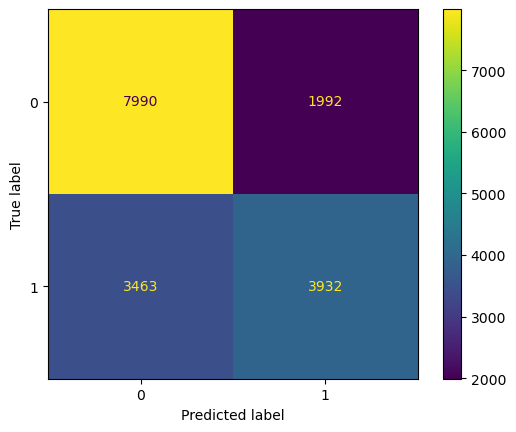

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      9982
           1       0.66      0.53      0.59      7395

    accuracy                           0.69     17377
   macro avg       0.68      0.67      0.67     17377
weighted avg       0.68      0.69      0.68     17377

Random Forest Runtime:  134.75971937179565 seconds


In [70]:
rf_start = time.time()
model_rf, results_rf = random_forest_model(app_train_cleaned)
rf_end = time.time()
print('Random Forest Runtime: ', rf_end - rf_start, 'seconds')

In [71]:
results_rf.to_csv("RandomForestSubmission.csv", index=False)

### Kaggle Score for Random Forest (0.66232)
![Random Forest](rf.jpeg)

# <a name = "initexp37">11. Gradient Boosting

We used Gradient Boosting due to its ability to handle complex relationships and nonlinearities in data. It combines weak predictive models to create a strong ensemble model, which helps identify default risk factors and predict credit default probabilities accurately, enabling better risk management and decision-making.


We under sampled the train data since it was heavily imbalanced and received a train accuracy of 100% and test accuracy 68%. The run time of this model was 340.75 seconds. We saw this improvement in accuracy by hypertuning the parameters as follows n_estimators=1000, learning_rate=0.01, max_depth=5, min_samples_split=5 and min_samples_leaf=2

In [72]:
def gb_model(df):
    categorical_columns = app_train_cleaned.select_dtypes(include=['object']).columns

    app_train_cleaned_encoded = pd.get_dummies(app_train_cleaned, columns=categorical_columns)

    app_train_cleaned_encoded_copy = app_train_cleaned_encoded.copy()
    missing_columns = ['NAME_INCOME_TYPE_Maternity leave', 'NAME_FAMILY_STATUS_Unknown']

    # Separating features and target variable
    X = app_train_cleaned_encoded_copy.drop('TARGET', axis=1)
    y = app_train_cleaned_encoded_copy['TARGET']
    undersampler = RandomUnderSampler(sampling_strategy=0.75)
    X, y = undersampler.fit_resample(X, y)

    # Splitting the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train = X_train.drop(missing_columns, axis=1)
    X_val = X_val.drop(missing_columns, axis=1)
    model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, max_depth=5, min_samples_split=5,min_samples_leaf=2)

    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_val)

    # Print metrics
    print('Accuracy:', accuracy_score(y_val, y_pred))
    print('ROC AUC score:', roc_auc_score(y_val, y_pred))
    print('Confusion Matrix:\n')
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
    disp.plot()
    plt.show()

    print('Classification Report:\n', classification_report(y_val, y_pred))

    categorical_columns_test = app_test_cleaned.select_dtypes(include=['object']).columns

    app_test_cleaned_encoded = pd.get_dummies(app_test_cleaned, columns=categorical_columns_test)

    results_gb = pd.DataFrame({'SK_ID_CURR': app_test_cleaned_encoded.index, 'TARGET': model.predict(app_test_cleaned_encoded)})

    return model, results_gb

Accuracy: 0.6949991367900098
ROC AUC score: 0.6793419297399281
Confusion Matrix:



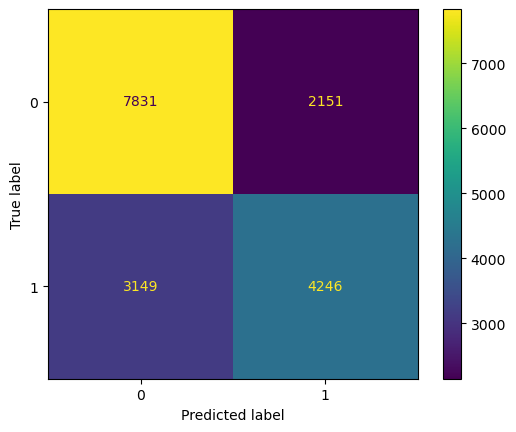

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.75      9982
           1       0.66      0.57      0.62      7395

    accuracy                           0.69     17377
   macro avg       0.69      0.68      0.68     17377
weighted avg       0.69      0.69      0.69     17377

Gradient Boosting Runtime:  345.68461751937866 seconds


In [73]:
gb_start = time.time()
model1, results_gb = gb_model(app_train_cleaned)
gb_end = time.time()
print('Gradient Boosting Runtime: ', gb_end - gb_start, 'seconds')

In [74]:
results_gb.to_csv("GBSubmission.csv", index=False)

### Kaggle Score for Gradient Boosting (0.66071)
![Gradient Boosting](gb.jpeg)

# <a name = "initexp38">12. Ensemble Modeling using Voting Classifier

Ensemble modeling was a strong candidate because it combines multiple models to make predictions, improving accuracy and robustness. In this case we used an ensemble of Random Forest, Gradient Boosting and Logistic Regression models. It helps mitigate individual model biases and leverages diverse perspectives, resulting in more reliable risk assessments. In theory, ensemble modeling provides a more comprehensive understanding of credit default risk, leading to better decision-making and reduced financial losses.


We under sampled the train data since it was heavily imbalanced and received a train accuracy of 100% and test accuracy 69%. The run time of this model was 322.42 seconds

In [75]:
from sklearn.ensemble import VotingClassifier
def ensemble_model(app_train_cleaned):
    categorical_columns = app_train_cleaned.select_dtypes(include=['object']).columns

    app_train_cleaned_encoded = pd.get_dummies(app_train_cleaned, columns=categorical_columns)

    app_train_cleaned_encoded_copy = app_train_cleaned_encoded.copy()
    missing_columns = ['NAME_INCOME_TYPE_Maternity leave', 'NAME_FAMILY_STATUS_Unknown']

    # Separating features and target variable
    X = app_train_cleaned_encoded_copy.drop('TARGET', axis=1)
    y = app_train_cleaned_encoded_copy['TARGET']
    undersampler = RandomUnderSampler(sampling_strategy=0.75)
    X, y = undersampler.fit_resample(X, y)

    # Splitting the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)



    X_train = X_train.drop(missing_columns, axis=1)
    X_val = X_val.drop(missing_columns, axis=1)

    # Instantiate and fit the model
    model1 = RandomForestClassifier(n_estimators=1000)
    model2 = GradientBoostingClassifier(n_estimators=1000) # Increase max_iter if convergence warning appears
    model3 = LogisticRegression(max_iter=1000)
    model = VotingClassifier([('rf', model1), ('gb', model2),('lg', model3)])
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_val)

    # Print metrics
    print('Accuracy:', accuracy_score(y_val, y_pred))
    print('ROC AUC score:', roc_auc_score(y_val, y_pred))
    print('Confusion Matrix:\n')
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
    disp.plot()
    plt.show()

    print('Classification Report:\n', classification_report(y_val, y_pred))

    categorical_columns_test = app_test_cleaned.select_dtypes(include=['object']).columns

    app_test_cleaned_encoded = pd.get_dummies(app_test_cleaned, columns=categorical_columns_test)

    results_ensemble = pd.DataFrame({'SK_ID_CURR': app_test_cleaned_encoded.index, 'TARGET': model.predict(app_test_cleaned_encoded)})
    return model, results_ensemble

Accuracy: 0.690683086838925
ROC AUC score: 0.6694170399213514
Confusion Matrix:



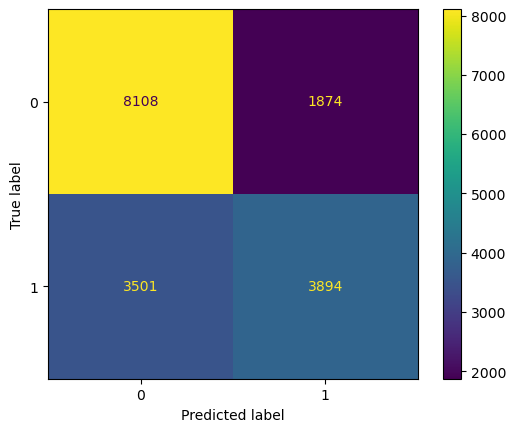

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      9982
           1       0.68      0.53      0.59      7395

    accuracy                           0.69     17377
   macro avg       0.69      0.67      0.67     17377
weighted avg       0.69      0.69      0.68     17377

Ensemble Modeling Runtime:  318.80814933776855 seconds


In [76]:
ensemble_start = time.time()
model1, results_ensemble = ensemble_model(app_train_cleaned)
ensemble_end = time.time()
print('Ensemble Modeling Runtime: ', ensemble_end - ensemble_start, 'seconds')

In [77]:
results_ensemble.to_csv("EnsembleSubmission.csv", index=False)

### Kaggle Score for Ensemble Modeling (0.65493)
![Ensemble Modeling](ensemble.jpeg)

# <a name = "initexp39">13. Modeling Process

Our plan for modeling was to split up and each of us do different types of models so that we could try as many models as possible. The first step was to implement the models against the cleaned version of the application_train data frame, which was split into a training and validation set. We then tried some of the models using the cleaned and joined application_train and bureau data frame. Since the application_train data frame had 92% of its records with the target variable equaling 0, those models weren’t good enough and needed to be balanced. To handle this, we oversampled the data frame and then resampled it by downsampling the data frame. Doing this balanced our data frame and allowed the models to predict the target variable equaling 1 more accurately. Our last step in the modeling process was creating an ensemble model using Random Forest, Gradient Boosting, and Logistic Regression models. In the end, the different models we implemented were Light Gradient Boosting, KNN, Random Forest, Gradient Boosting, the Ensemble model, Naïve Bayes, and Logistic Regression. The model rankings below present which one performed the best on the application_test data frame.

# <a name = "initexp40">14. Results

After considering and implementing several models we found that the best performing models were Random Forest (Kaggle Score: 0.66232), Gradient Boosting (Kaggle Score: 0.66071), Light Gradient Boosting (Kaggle Score: 0.6677) , and Ensemble Modeling (Kaggle Score: 0.65493) by applying the Voting Classifier on Random Forest, Gradient Boosting and Logistic Regression.

We also used Logstic Regression and Naive Bayes, however, they gave a lower kaggle score of 0.57819 and 0.57276 respectively. However they treated as a good baseline models.

__Best Model:__
Light Gradient Boosting and Random Forest turned out to be our best performing model followed by Gradient Boosting.  

## <a name = "initexp41">15. Model Rankings



1. Light Gradient Boosting (Kaggle Score: 0.671) 

2. Random Forest (Kaggle Score: 0.66232)

3. Gradient Boosting (Kaggle Score: 0.66071)

4. Ensemble Modeling (Kaggle Score: 0.65493)

5. Naive Bayes (Kaggle Score: 0.57)

6. Logistic Regression (Kaggle Score: 0.57)

7. KNN (Kaggle Score: 0.55)



## <a name = "initexp42">16. Contributions



__1. Sanskriti Bhargava:__ Applied robust category encoding and sampling techniques to refine the quality and representation of the dataset. This involved transformation of categorical variables and under/oversampling to counteract any class imbalance. Applied various machine learning algorithms, including Logistic Regression, Random Forest, Gradient Boosting and Ensemble modeling using Voting Classifier. Leveraged Random Forest model which yielded the most promising results with a Kaggle score of 0.66. This score was achieved after systematic optimization of hyperparameters. Explored the power of Ensembling to leverage the strengths of all the models. The ensemble model combined predictions from the Logistic Regression, Random Forest, and Gradient Boosting models to generate potentially more accurate predictions. Revisited the cleaned data from the previous assignment to conduct additional modelling attempts.  Analyzed and evaluated the results from each model, comparing their accuracy, precision, recall, and F1 scores to discern the most effective algorithm for this dataset.



**2. Joe Sarnello:** I contributed with working on sections 1-7 (Cleaning the data frames, and implementing the KNN, Light Gradient Boosting, and Gradient Boosting models) and the modeling process section.

**3. Daryle Bilog** I
Contributed to the development of the Introduction and implemented a Naïve Bayes model.


**4. Vinay Kumar Vascuri:** During the modeling phase of the Home Credit Kaggle project, I made significant contributions by developing and implementing various models to predict loan repayment probabilities. Firstly, I worked on  logistic regression model and contributed in combining all the models derived by the team members. Throughout the modeling phase, I conducted thorough evaluations using metrics such as accuracy, ROC AUC score to assess model performance. These evaluations helped in selecting the most suitable models for deployment. Overall, my contributions in developing and evaluating multiple models greatly enriched the project's modeling phase, enabling the team to make informed decisions and achieve promising results in predicting loan repayment probabilities.